In [187]:
#Checking out the data, so that we have a brief idea..
import pandas as pd

# Load the training and test datasets
train_data = pd.read_csv('dataset_train.csv')
test_data = pd.read_csv('dataset_test.csv')

print("Training DataSet")
# Display the first few rows of the training data to verify
print(train_data.head())

print("-------------------------------------------------------------")
print("Testing DataSet")
# Display the first few rows of the test data to verify
print(test_data.head())


Training DataSet
         V1        V2        V3        V4        V5        V6        V7  \
0  0.057251 -0.117296  1.166098 -0.290146  0.378500  0.118503  0.718407   
1 -0.299707 -0.904430  1.100115 -3.328556  1.223457  0.470599  0.264523   
2 -0.601448  0.160740  0.005578 -0.295077 -0.020659  0.742921  0.199073   
3 -0.190938 -0.205359  2.142113 -0.187469 -0.154959  0.538567  0.457024   
4  0.031576 -0.122682  0.196996 -0.820535  2.518562  2.220973  0.920531   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0 -0.188185  0.218020  0.561315  ... -0.045827  0.338948 -0.233355  0.098168   
1 -0.023817  1.612745 -0.129787  ...  0.087319  1.230137 -0.233352 -2.492362   
2  0.290432  0.198442  0.839104  ... -0.054693  0.064027 -0.339293 -2.210574   
3 -0.010629  0.406575  0.294145  ... -0.044813  0.123519  0.017771  0.763533   
4 -0.036027 -0.216609  0.569293  ... -0.071019  0.241484 -0.631164  1.554405   

        V25       V26       V27       V28    Amount

## Data Science Project Assignment #2
Problem statment: The goal of this project is to detect anomalous transactions in a dataset of financial transactions


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the datasets
train_data = pd.read_csv('dataset_train.csv')
test_data = pd.read_csv('dataset_test.csv')

# Separate features (X) and target variable (y)
# "class" column as target variable (y) 
# rest of the columns as variables (X)
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

# Convert categorical variables to numerical (One-Hot Encoding)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns of train and test data
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()  # Experiment with hyperparameters here

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

# Evaluation Metrics
# use weighted otherwise I was getting a zero for some metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
recall_test = recall_score(y_test, y_pred_test, average='weighted', zero_division=1)
f1_test = f1_score(y_test, y_pred_test, average='weighted', zero_division=1)


# Print the metrics
print(f"Training Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")


Training Accuracy: 1.0
Test Accuracy: 0.9817857142857143
Test Precision: 0.9818491927563171
Test Recall: 0.9817857142857143
Test F1 Score: 0.9818115495210593


# STEP 1 AND 2
# LOADING DATASETS
# SPLITING INTO TRAINING AND VALIDATION
# PRINTING OUT STATISTICS

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Set the random seed to our TeamID to ensure that every time we run our code we get the same results.
random_seed = 7

# Load the datasets
train_data = pd.read_csv('dataset_train.csv')
test_data = pd.read_csv('dataset_test.csv')

# Separate features and target variable for the training data
X = train_data.drop('Class', axis=1)
y = train_data['Class']

# Split the training data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Convert categorical variables to numerical (One-Hot Encoding)
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(test_data.drop('Class', axis=1)) #y_train??
y_test = test_data['Class']

# Align columns of train, validation, and test data to make sure that we have the same set of columns
X_train, X_val = X_train.align(X_val, join='inner', axis=1)
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Printing out the statistics
# This includes the number of instances and features in the original and split datasets
# as well as the distribution of the target classes in each set
print("Number of instances and features in the training file:", train_data.shape)
print("Number of instances and features in the test file:", test_data.shape)
print("Number of instances in the training set:", X_train.shape[0])
print("Number of instances in the validation set:", X_val.shape[0])
print("Number of instances in the test set:", X_test.shape[0])
print("\nClass distribution in the training set:\n", y_train.value_counts())
print("\nClass distribution in the validation set:\n", y_val.value_counts())
print("\nClass distribution in the test set:\n", y_test.value_counts())



Number of instances and features in the training file: (22400, 30)
Number of instances and features in the test file: (5600, 30)
Number of instances in the training set: 17920
Number of instances in the validation set: 4480
Number of instances in the test set: 5600

Class distribution in the training set:
 Class
0    13475
1     4445
Name: count, dtype: int64

Class distribution in the validation set:
 Class
0    3325
1    1155
Name: count, dtype: int64

Class distribution in the test set:
 Class
0    4200
1    1400
Name: count, dtype: int64


# CREATE BASELINE MODEL
Generate predictions on the training, validation, and test sets
Compute the accuracy, precisio, recall and F1 of the baseline model on each set (validation set, training set and test set)

In [4]:
from sklearn.dummy import DummyClassifier

# Create a baseline model using DummyClassifier
# We used Stratified because it generates predictions by respecting the training set's class distribution
# Each class is predicted with the frequency it appears in the training data
baseline_model = DummyClassifier(strategy='stratified', random_state=random_seed)

# Fit the baseline model on the training data
#this model does not learn anything from the data
#it mimics the class distribution
baseline_model.fit(X_train, y_train)


DummyClassifier(random_state=7, strategy='stratified')

In [5]:
# Generate predictions on the training, validation, and test sets for baseline model
y_pred_train_baseline = baseline_model.predict(X_train)
y_pred_val_baseline = baseline_model.predict(X_val)
y_pred_test_baseline = baseline_model.predict(X_test)

In [6]:
#VALIDATION SET
# Compute, accuracy, precision, recall and F1 of the baseline model
accuracy_val_baseline = accuracy_score(y_val, y_pred_val_baseline)
precision_val_baseline = precision_score(y_val, y_pred_val_baseline, average='weighted', zero_division=1)
recall_val_baseline = recall_score(y_val, y_pred_val_baseline, average='weighted', zero_division=1)
f1_val_baseline = f1_score(y_val, y_pred_val_baseline, average='weighted', zero_division=1)

print(f"Validation Accuracy of Baseline Model: {accuracy_val_baseline}")
print(f"Validation Precision of Baseline Model: {precision_val_baseline}")
print(f"Validation Recall of Baseline Model: {recall_val_baseline}")
print(f"Validation F1 Score of Baseline Model: {f1_val_baseline}")

Validation Accuracy of Baseline Model: 0.6227678571428571
Validation Precision of Baseline Model: 0.618238427495503
Validation Recall of Baseline Model: 0.6227678571428571
Validation F1 Score of Baseline Model: 0.6204587498062917


In [7]:
#TRAINING SET
# Compute, accuracy, precision, recall and F1 of the baseline model
accuracy_train_baseline = accuracy_score(y_train, y_pred_train_baseline)
precision_train_baseline = precision_score(y_train, y_pred_train_baseline, average='weighted', zero_division=1)
recall_train_baseline = recall_score(y_train, y_pred_train_baseline, average='weighted', zero_division=1)
f1_train_baseline = f1_score(y_train, y_pred_train_baseline, average='weighted', zero_division=1)


print(f"Training Set Accuracy of Baseline Model: {accuracy_train_baseline}")
print(f"Training Set Precision of Baseline Model: {precision_train_baseline}")
print(f"Training Set Recall of Baseline Model: {recall_train_baseline}")
print(f"Training Set F1 Score of Baseline Model: {f1_train_baseline}")

Training Set Accuracy of Baseline Model: 0.6239955357142857
Training Set Precision of Baseline Model: 0.6251257937361191
Training Set Recall of Baseline Model: 0.6239955357142857
Training Set F1 Score of Baseline Model: 0.6245581976393253


In [8]:
#TEST SET
# Compute, accuracy, precision, recall and F1 of the baseline model
accuracy_test_baseline = accuracy_score(y_test, y_pred_test_baseline)
precision_test_baseline = precision_score(y_test, y_pred_test_baseline, average='weighted', zero_division=1)
recall_test_baseline = recall_score(y_test, y_pred_test_baseline, average='weighted', zero_division=1)
f1_test_baseline = f1_score(y_test, y_pred_test_baseline, average='weighted', zero_division=1)


print(f"Test Set Accuracy of Baseline Model: {accuracy_test_baseline}")
print(f"Test Set Precision of Baseline Model: {precision_test_baseline}")
print(f"Test Set Recall of Baseline Model: {recall_test_baseline}")
print(f"Test Set F1 Score of Baseline Model: {f1_test_baseline}")

Test Set Accuracy of Baseline Model: 0.6276785714285714
Test Set Precision of Baseline Model: 0.6272348160365498
Test Set Recall of Baseline Model: 0.6276785714285714
Test Set F1 Score of Baseline Model: 0.6274562909248798


In [9]:
# Compute the accuracy of the baseline model on each set
accuracy_val_baseline = accuracy_score(y_val, y_pred_val_baseline)
accuracy_train_baseline = accuracy_score(y_train, y_pred_train_baseline)
accuracy_test_baseline = accuracy_score(y_test, y_pred_test_baseline)

print(f"Validation Set Accuracy of Baseline Model: {accuracy_val_baseline}")
print(f"Training Set Accuracy of Baseline Model: {accuracy_train_baseline}")
print(f"Test Set Accuracy of Baseline Model: {accuracy_test_baseline}")

Validation Set Accuracy of Baseline Model: 0.6227678571428571
Training Set Accuracy of Baseline Model: 0.6239955357142857
Test Set Accuracy of Baseline Model: 0.6276785714285714


# MODEL 1 - Decision Tree


Hyperparameter tuning for predict_DT

In [11]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# Define the range of 'max_leaf_nodes'
#These are the values provided in the instructions
#"none" value allows the tree to expand fully
max_leaf_nodes_range = [2, 4, 10, 20, 50, 100, 200, 400, 800, None]

#list holding the accuracies of the max leaf nodes
accuracies_train = []
accuracies_val = []
accuracies_test = []

#we initiate the accuracy to zero because we know that as a percentage it is always positive
best_accuracy = 0

#we initiate the best_leaf_node to "None" to store the best hyperparameter Value
#"None" is used to indicate an unselected state
best_leaf_node = None

# Iterate through the range and evaluate each model
for leaf_nodes in max_leaf_nodes_range:
    
    dt_model = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes, random_state=random_seed)
    
    #use the full training set
    dt_model.fit(X_train, y_train)
    
    y_pred_train = dt_model.predict(X_train)
    y_pred_val = dt_model.predict(X_val)
    y_pred_test = dt_model.predict(X_test)
    
    current_accuracy = accuracy_score(y_val, y_pred_val)
    
    accuracies_val.append(accuracy_score(y_val, y_pred_val))
    accuracies_train.append(accuracy_score(y_train, y_pred_train))
    accuracies_test.append(accuracy_score(y_test, y_pred_test))

    #choose the model with the highest accuracy on the Validation Set
    if current_accuracy > best_accuracy:
        
        #we update best_accuracy as we iterate through different models
        best_accuracy = current_accuracy
        
        #we update the best_leaf_node with the corresponding number of leaf_nodes
        #when we find a model that has better accuracy
        best_leaf_node = leaf_nodes

print("----------------------------------------------")
print(f"--> Best 'max_leaf_nodes': {best_leaf_node}")
print(f"--> Best Validation Accuracy: {best_accuracy}")
print("----------------------------------------------")

----------------------------------------------
--> Best 'max_leaf_nodes': 100
--> Best Validation Accuracy: 0.9834821428571429
----------------------------------------------


In [12]:
print("ACCURACIES FOR TRAINING SET:")
#here we used zip because we are combing the two lists into pair
#list 1 = "max_leaf_nodes_range", list 2 = "accuracies_val", pair: (max_leaf_node, accuracy)
for leaf_nodes, accuracy in zip(max_leaf_nodes_range, accuracies_train):
    
    #in each loop we get a pair and thus it is easy to print the number of leaf nodes and accuracy side by side
    print(f"Max Leaf Nodes: {leaf_nodes}, Validation Accuracy: {accuracy}")

ACCURACIES FOR TRAINING SET:
Max Leaf Nodes: 2, Validation Accuracy: 0.9575892857142857
Max Leaf Nodes: 4, Validation Accuracy: 0.9634486607142857
Max Leaf Nodes: 10, Validation Accuracy: 0.9712053571428572
Max Leaf Nodes: 20, Validation Accuracy: 0.9786272321428572
Max Leaf Nodes: 50, Validation Accuracy: 0.9864397321428572
Max Leaf Nodes: 100, Validation Accuracy: 0.9916852678571428
Max Leaf Nodes: 200, Validation Accuracy: 0.9981584821428572
Max Leaf Nodes: 400, Validation Accuracy: 1.0
Max Leaf Nodes: 800, Validation Accuracy: 1.0
Max Leaf Nodes: None, Validation Accuracy: 1.0


In [13]:
print("ACCURACIES FOR VALIDATION SET:")
#here we used zip because we are combing the two lists into pair
#list 1 = "max_leaf_nodes_range", list 2 = "accuracies_val", pair: (max_leaf_node, accuracy)
for leaf_nodes, accuracy in zip(max_leaf_nodes_range, accuracies_val):
    
    #in each loop we get a pair and thus it is easy to print the number of leaf nodes and accuracy side by side
    print(f"Max Leaf Nodes: {leaf_nodes}, Validation Accuracy: {accuracy}")

ACCURACIES FOR VALIDATION SET:
Max Leaf Nodes: 2, Validation Accuracy: 0.9611607142857143
Max Leaf Nodes: 4, Validation Accuracy: 0.9667410714285715
Max Leaf Nodes: 10, Validation Accuracy: 0.9738839285714286
Max Leaf Nodes: 20, Validation Accuracy: 0.9765625
Max Leaf Nodes: 50, Validation Accuracy: 0.9816964285714286
Max Leaf Nodes: 100, Validation Accuracy: 0.9834821428571429
Max Leaf Nodes: 200, Validation Accuracy: 0.9825892857142857
Max Leaf Nodes: 400, Validation Accuracy: 0.9805803571428572
Max Leaf Nodes: 800, Validation Accuracy: 0.9805803571428572
Max Leaf Nodes: None, Validation Accuracy: 0.9825892857142857


In [14]:
print("ACCURACIES FOR TEST SET:")
#here we used zip because we are combing the two lists into pair
#list 1 = "max_leaf_nodes_range", list 2 = "accuracies_val", pair: (max_leaf_node, accuracy)
for leaf_nodes, accuracy in zip(max_leaf_nodes_range, accuracies_test):
    
    #in each loop we get a pair and thus it is easy to print the number of leaf nodes and accuracy side by side
    print(f"Max Leaf Nodes: {leaf_nodes}, Validation Accuracy: {accuracy}")

ACCURACIES FOR TEST SET:
Max Leaf Nodes: 2, Validation Accuracy: 0.9580357142857143
Max Leaf Nodes: 4, Validation Accuracy: 0.9639285714285715
Max Leaf Nodes: 10, Validation Accuracy: 0.9678571428571429
Max Leaf Nodes: 20, Validation Accuracy: 0.9721428571428572
Max Leaf Nodes: 50, Validation Accuracy: 0.9776785714285714
Max Leaf Nodes: 100, Validation Accuracy: 0.9801785714285715
Max Leaf Nodes: 200, Validation Accuracy: 0.9794642857142857
Max Leaf Nodes: 400, Validation Accuracy: 0.9775
Max Leaf Nodes: 800, Validation Accuracy: 0.9775
Max Leaf Nodes: None, Validation Accuracy: 0.9783928571428572


In [15]:
accuracy_df = pd.DataFrame({
    'Leaf Nodes': max_leaf_nodes_range,
    'Training Accuracy': accuracies_train,
    'Validation Accuracy': accuracies_val,
    'Test Accuracy': accuracies_test
})

# Display the DataFrame
print(accuracy_df)


   Leaf Nodes  Training Accuracy  Validation Accuracy  Test Accuracy
0         2.0           0.957589             0.961161       0.958036
1         4.0           0.963449             0.966741       0.963929
2        10.0           0.971205             0.973884       0.967857
3        20.0           0.978627             0.976562       0.972143
4        50.0           0.986440             0.981696       0.977679
5       100.0           0.991685             0.983482       0.980179
6       200.0           0.998158             0.982589       0.979464
7       400.0           1.000000             0.980580       0.977500
8       800.0           1.000000             0.980580       0.977500
9         NaN           1.000000             0.982589       0.978393


Use the Best 'max_leaf_nodes'from previous step to train the model on the full training set

In [17]:
best_leaf_nodes = best_leaf_node

# Train the Decision Tree model with the best_leaf_nodes
dt_best_model = DecisionTreeClassifier(max_leaf_nodes=best_leaf_nodes, random_state=random_seed)
dt_best_model.fit(X_train, y_train)

# Generate predictions
y_pred_train_dt = dt_best_model.predict(X_train)
y_pred_val_dt = dt_best_model.predict(X_val)
y_pred_test_dt = dt_best_model.predict(X_test)



In [18]:
#TRAINING SET
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
precision_train_dt = precision_score(y_train, y_pred_train_dt, average='weighted', zero_division=1)
recall_train_dt = recall_score(y_train, y_pred_train_dt, average='weighted', zero_division=1)
f1_train_dt = f1_score(y_train, y_pred_train_dt, average='weighted', zero_division=1)

#printing 
print(f"Training Set Accuracy of DT Model: {accuracy_train_dt}")
print(f"Training Set Precision of DT Model: {precision_train_dt}")
print(f"Training Set Recall of DT Model: {recall_train_dt}")
print(f"Training Set F1 Score of DT Model: {f1_train_dt}")




Training Set Accuracy of DT Model: 0.9916852678571428
Training Set Precision of DT Model: 0.9917173831099315
Training Set Recall of DT Model: 0.9916852678571428
Training Set F1 Score of DT Model: 0.9916497557812205


In [19]:
#VALIDATION SET
accuracy_val_dt = accuracy_score(y_val, y_pred_val_dt)
precision_val_dt = precision_score(y_val, y_pred_val_dt, average='weighted', zero_division=1)
recall_val_dt = recall_score(y_val, y_pred_val_dt, average='weighted', zero_division=1)
f1_val_dt = f1_score(y_val, y_pred_val_dt, average='weighted', zero_division=1)

print(f"Validation Set Accuracy of DT Model: {accuracy_val_dt}")
print(f"Validation Set Precision of DT Model: {precision_val_dt}")
print(f"Validation Set Recall of DT Model: {recall_val_dt}")
print(f"Validation Set F1 Score of DT Model: {f1_val_dt}")

Validation Set Accuracy of DT Model: 0.9834821428571429
Validation Set Precision of DT Model: 0.9834421083969007
Validation Set Recall of DT Model: 0.9834821428571429
Validation Set F1 Score of DT Model: 0.983425134419068


In [20]:
#TEST SET
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
precision_test_dt = precision_score(y_test, y_pred_test_dt, average='weighted', zero_division=1)
recall_test_dt = recall_score(y_test, y_pred_test_dt, average='weighted', zero_division=1)
f1_test_dt = f1_score(y_test, y_pred_test_dt, average='weighted', zero_division=1)

print(f"Test Set Accuracy (DT): {accuracy_test_dt}")
print(f"Test Set Precision (DT): {precision_test_dt}")
print(f"Test Set Recall (DT): {recall_test_dt}")
print(f"Test Set F1-Score (DT): {f1_test_dt}")

Test Set Accuracy (DT): 0.9801785714285715
Test Set Precision (DT): 0.9801097209559204
Test Set Recall (DT): 0.9801785714285715
Test Set F1-Score (DT): 0.980104058013216


In [67]:
print("Decision Tree - Better for Visualization:")
data = {
    "Dataset": ["Training Set", "Validation Set", "Test Set"],
    "Accuracy": [accuracy_train_dt, accuracy_val_dt, accuracy_test_dt],
    "Precision": [precision_train_dt, precision_val_dt, precision_test_dt],
    "Recall": [recall_train_dt, recall_val_dt, recall_test_dt],
    "F1 Score": [f1_train_dt, f1_val_dt, f1_test_dt]
}

df = pd.DataFrame(data)
print(df)


Decision Tree - Better for Visualization:
          Dataset  Accuracy  Precision    Recall  F1 Score
0    Training Set  0.991685   0.991717  0.991685  0.991650
1  Validation Set  0.983482   0.983442  0.983482  0.983425
2        Test Set  0.980179   0.980110  0.980179  0.980104


FIRST PLOT FOR DT MODEL

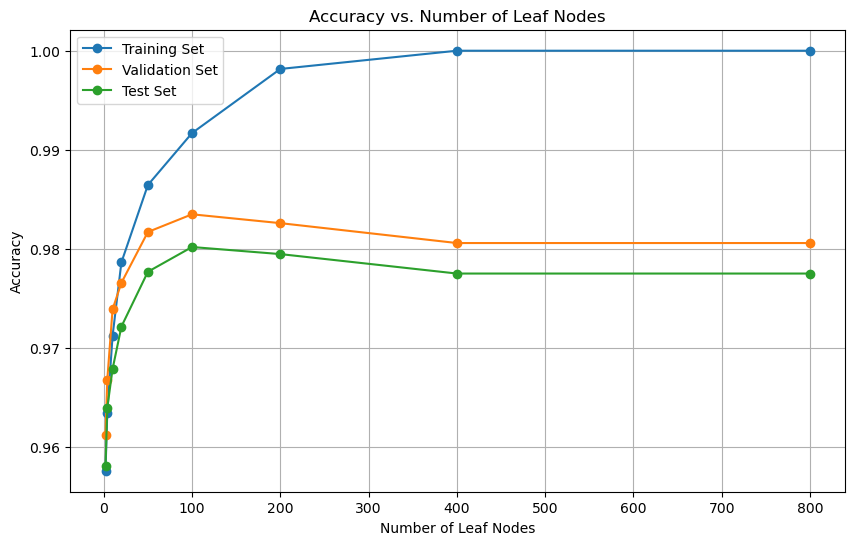

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(max_leaf_nodes_range, accuracies_train, label='Training Set', marker='o')
plt.plot(max_leaf_nodes_range, accuracies_val, label='Validation Set', marker='o')
plt.plot(max_leaf_nodes_range, accuracies_test, label='Test Set', marker='o')
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Leaf Nodes')
plt.legend()
plt.grid(True)
plt.show()

## MODEL 2 - NAIVE BAYES

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Generate predictions on the training, validation, and test sets
y_pred_train_nb = nb_model.predict(X_train)
y_pred_val_nb = nb_model.predict(X_val)
y_pred_test_nb = nb_model.predict(X_test)

# Compute the accuracy of the Naive Bayes model on each set
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_val_nb = accuracy_score(y_val, y_pred_val_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

accuracy_train_nb, accuracy_val_nb, accuracy_test_nb


(0.948046875, 0.9504464285714286, 0.9494642857142858)

In [44]:
# Predict Output - to check
predicted = nb_model.predict(X_test.iloc[[11]])

print("Actual Value:", y_test[11])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [29]:
#VALIDATION SET
# Compute, accuracy, precision, recall and F1 of the Naive Bayes model
accuracy_val_nb = accuracy_score(y_val, y_pred_val_nb)
precision_val_nb = precision_score(y_val, y_pred_val_nb, average='weighted', zero_division=1)
recall_val_nb = recall_score(y_val, y_pred_val_nb, average='weighted', zero_division=1)
f1_val_nb = f1_score(y_val, y_pred_val_nb, average='weighted', zero_division=1)

print(f"Validation Accuracy of NB Model: {accuracy_val_nb}")
print(f"Validation Precision of NB Model: {precision_val_nb}")
print(f"Validation Recall of NB Model: {recall_val_nb}")
print(f"Validation F1 Score of NB Model: {f1_val_nb}")

Validation Accuracy of NB Model: 0.9504464285714286
Validation Precision of NB Model: 0.9501675904242501
Validation Recall of NB Model: 0.9504464285714286
Validation F1 Score of NB Model: 0.949724686294076


In [30]:
#TRAINING SET
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
precision_train_nb = precision_score(y_train, y_pred_train_nb, average='weighted', zero_division=1)
recall_train_nb = recall_score(y_train, y_pred_train_nb, average='weighted', zero_division=1)
f1_train_nb = f1_score(y_train, y_pred_train_nb, average='weighted', zero_division=1)

#printing 
print(f"Training Set Accuracy of NB Model: {accuracy_train_nb}")
print(f"Training Set Precision of NB Model: {precision_train_nb}")
print(f"Training Set Recall of NB Model: {recall_train_nb}")
print(f"Training Set F1 Score of NB Model: {f1_train_nb}")

Training Set Accuracy of NB Model: 0.948046875
Training Set Precision of NB Model: 0.947932187063939
Training Set Recall of NB Model: 0.948046875
Training Set F1 Score of NB Model: 0.9469837167261862


In [45]:
#TEST SET
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)
precision_test_nb = precision_score(y_test, y_pred_test_nb, average='weighted', zero_division=1)
recall_test_nb = recall_score(y_test, y_pred_test_nb, average='weighted', zero_division=1)
f1_test_nb = f1_score(y_test, y_pred_test_nb, average='weighted', zero_division=1)

print(f"Test Set Accuracy of NB Model: {accuracy_test_nb}")
print(f"Test Set Precision of NB Model: {precision_test_nb}")
print(f"Test Set Recall of NB Model: {recall_test_nb}")
print(f"Test Set F1-Score of NB Model: {f1_test_nb}")

Test Set Accuracy of NB Model: 0.9494642857142858
Test Set Precision of NB Model: 0.949433324572688
Test Set Recall of NB Model: 0.9494642857142858
Test Set F1-Score of NB Model: 0.948441365168558


In [66]:
print("Naive Bayes - Better for Visualization:")
data_nb = {
    "Dataset": ["Training Set", "Validation Set", "Test Set"],
    "Accuracy": [accuracy_train_nb, accuracy_val_nb, accuracy_test_nb],
    "Precision": [precision_train_nb, precision_val_nb, precision_test_nb],
    "Recall": [recall_train_nb, recall_val_nb, recall_test_nb],
    "F1 Score": [f1_train_nb, f1_val_nb, f1_test_nb]
}

df_nb = pd.DataFrame(data_nb)
print(df_nb)


Naive Bayes - Better for Visualization:
          Dataset  Accuracy  Precision    Recall  F1 Score
0    Training Set  0.948047   0.947932  0.948047  0.946984
1  Validation Set  0.950446   0.950168  0.950446  0.949725
2        Test Set  0.949464   0.949433  0.949464  0.948441


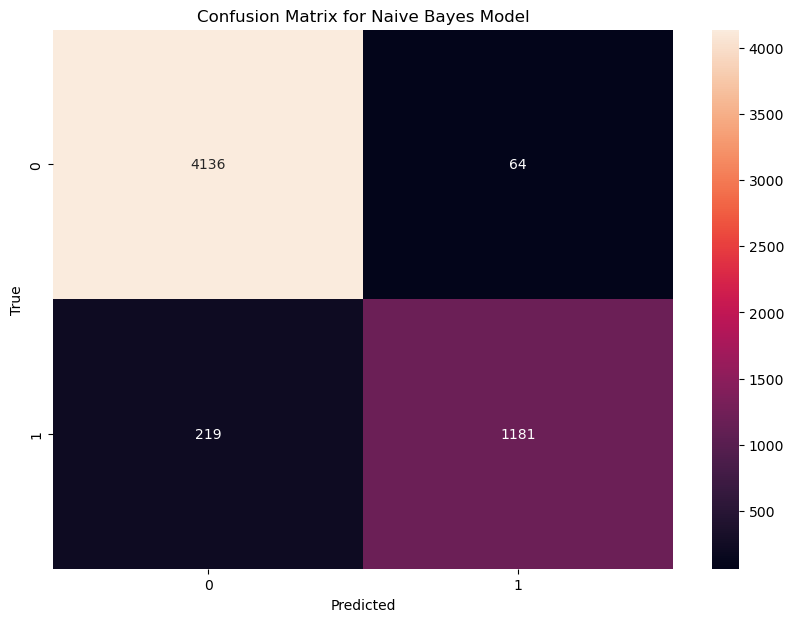

In [53]:
#Confusion Matrix Test Set
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test_nb)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Naive Bayes Model For Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


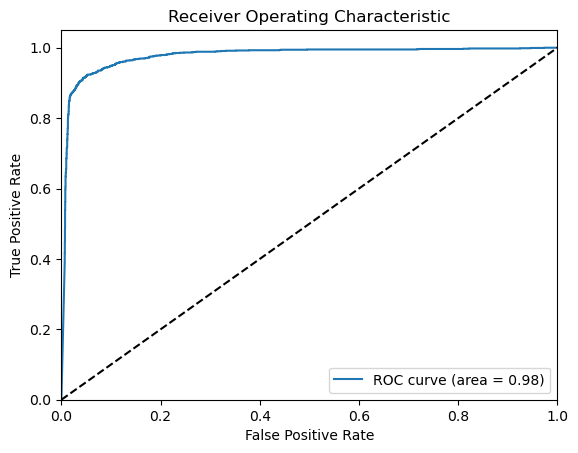

In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=[0, 1])  
y_prob_nb = nb_model.predict_proba(X_test)[:,1] 

fpr, tpr, _ = roc_curve(y_test_bin, y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Model 3 - Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=random_seed, max_iter=1000)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Generate predictions on the training, validation, and test sets
y_pred_train_lr = lr_model.predict(X_train)
y_pred_val_lr = lr_model.predict(X_val)
y_pred_test_lr = lr_model.predict(X_test)

# Compute the accuracy of the Logistic Regression model on each set
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_val_lr = accuracy_score(y_val, y_pred_val_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

accuracy_train_lr, accuracy_val_lr, accuracy_test_lr

(0.972265625, 0.9743303571428571, 0.9719642857142857)

In [58]:
#VALIDATION SET
# Compute, accuracy, precision, recall and F1 of the Logistic Regression model
accuracy_val_lr = accuracy_score(y_val, y_pred_val_lr)
precision_val_lr = precision_score(y_val, y_pred_val_lr, average='weighted', zero_division=1)
recall_val_lr = recall_score(y_val, y_pred_val_lr, average='weighted', zero_division=1)
f1_val_lr = f1_score(y_val, y_pred_val_lr, average='weighted', zero_division=1)

print(f"Validation Accuracy of LR Model: {accuracy_val_lr}")
print(f"Validation Precision of LR Model: {precision_val_lr}")
print(f"Validation Recall of LR Model: {recall_val_lr}")
print(f"Validation F1 Score of LR Model: {f1_val_lr}")

Validation Accuracy of LR Model: 0.9743303571428571
Validation Precision of LR Model: 0.974317851277092
Validation Recall of LR Model: 0.9743303571428571
Validation F1 Score of LR Model: 0.9741147190903158


In [59]:
#TRAINING SET
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
precision_train_lr = precision_score(y_train, y_pred_train_lr, average='weighted', zero_division=1)
recall_train_lr = recall_score(y_train, y_pred_train_lr, average='weighted', zero_division=1)
f1_train_lr = f1_score(y_train, y_pred_train_lr, average='weighted', zero_division=1)

#printing 
print(f"Training Set Accuracy of LR Model: {accuracy_train_lr}")
print(f"Training Set Precision of LR Model: {precision_train_lr}")
print(f"Training Set Recall of LR Model: {recall_train_lr}")
print(f"Training Set F1 Score of LR Model: {f1_train_lr}")

Training Set Accuracy of LR Model: 0.972265625
Training Set Precision of LR Model: 0.97230234897041
Training Set Recall of LR Model: 0.972265625
Training Set F1 Score of LR Model: 0.9719560935857725


In [60]:
#TEST SET
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
precision_test_lr = precision_score(y_test, y_pred_test_lr, average='weighted', zero_division=1)
recall_test_lr = recall_score(y_test, y_pred_test_lr, average='weighted', zero_division=1)
f1_test_lr = f1_score(y_test, y_pred_test_lr, average='weighted', zero_division=1)

print(f"Test Set Accuracy of LR Model: {accuracy_test_lr}")
print(f"Test Set Precision of LR Model: {precision_test_lr}")
print(f"Test Set Recall of LR Model: {recall_test_lr}")
print(f"Test Set F1-Score of LR Model: {f1_test_lr}")

Test Set Accuracy of LR Model: 0.9719642857142857
Test Set Precision of LR Model: 0.9720965889677433
Test Set Recall of LR Model: 0.9719642857142857
Test Set F1-Score of LR Model: 0.9716137739313714


In [64]:
print("Logistic Regression - Better for Visualization:")
data = {
    "Dataset": ["Training Set", "Validation Set", "Test Set"],
    "Accuracy": [accuracy_train_lr, accuracy_val_lr, accuracy_test_lr],
    "Precision": [precision_train_lr, precision_val_lr, precision_test_lr],
    "Recall": [recall_train_lr, recall_val_lr, recall_test_lr],
    "F1 Score": [f1_train_lr, f1_val_lr, f1_test_lr]
}

df = pd.DataFrame(data)
print(df)


Logistic Regression - Better for Visualization:
          Dataset  Accuracy  Precision    Recall  F1 Score
0    Training Set  0.972266   0.972302  0.972266  0.971956
1  Validation Set  0.974330   0.974318  0.974330  0.974115
2        Test Set  0.971964   0.972097  0.971964  0.971614


# MODEL 3 - ENSEMBLE DT

In [246]:
from sklearn.ensemble import BaggingClassifier

# Parameters to experiment with
n_base_classifiers = [5, 15, 25]
max_features_options = [0.1, 0.3, 0.5]
max_leaf_nodes = 400
best_accuracy = 0
best_configuration = {}
accuracy_results = {}  # Dictionary to store accuracy results

# Iterate over the options, train the model and evaluate it. here we are also storrung the accuracy results
for n_classifiers in n_base_classifiers:
    for max_features in max_features_options:
        # Create the ensemble model
        dt_ensemble = BaggingClassifier(
            estimator =DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes),
            n_estimators=n_classifiers,
            max_features=max_features,
            random_state=team_id,
            bootstrap=True
        )
        
        #justtttttttt tryinggggggg something..the commented code works
#         # Fit and evaluate the model
        dt_ensemble.fit(X_train, y_train)
#         accuracy_val = accuracy_score(y_val, dt_ensemble.predict(X_val))

#         # Storing the accuracy in the dictionary
#         accuracy_results[(n_classifiers, max_features)] = accuracy_val
     
    #---------------------------
       # Calculate accuracies for each set
        train_accuracy = accuracy_score(y_train, dt_ensemble.predict(X_train))
        accuracy_val = accuracy_score(y_val, dt_ensemble.predict(X_val))
        test_accuracy = accuracy_score(y_test, dt_ensemble.predict(X_test))

        # Store the accuracies in a tuple
        accuracy_results[(n_classifiers, max_features)] = (train_accuracy, accuracy_val, test_accuracy)  
        
     #---------------------------   
        
        
        
        # Update the best model if needed
        if accuracy_val > best_accuracy:
            best_accuracy = accuracy_val
            best_configuration = {'n_classifiers': n_classifiers, 'max_features': max_features}

# Print the best configuration
print("Best Configuration:", best_configuration)
print("Accuracy results for all the configuration:", accuracy_results)


Best Configuration: {'n_classifiers': 25, 'max_features': 0.5}
Accuracy results for all the configuration: {(5, 0.1): (0.97734375, 0.9665178571428571, 0.9616071428571429), (5, 0.3): (0.9969866071428571, 0.9839285714285714, 0.9808928571428571), (5, 0.5): (0.9982142857142857, 0.9877232142857143, 0.98375), (15, 0.1): (0.969921875, 0.9573660714285714, 0.9557142857142857), (15, 0.3): (0.9989955357142857, 0.9850446428571429, 0.9835714285714285), (15, 0.5): (0.9996651785714286, 0.9883928571428572, 0.9855357142857143), (25, 0.1): (0.96875, 0.9560267857142857, 0.95375), (25, 0.3): (0.9995535714285714, 0.9854910714285714, 0.9832142857142857), (25, 0.5): (0.9998883928571428, 0.9895089285714286, 0.9873214285714286)}


In [248]:
ensemble_accuracies = {}
ensemble_accuracies[(n_classifiers, max_features)] = accuracy_val
for params, accuracy in ensemble_accuracies.items():
    print(f"n_classifiers: {params[0]}, max_features: {params[1]}, Validation Accuracy: {accuracy}")

n_classifiers: 25, max_features: 0.5, Validation Accuracy: 0.9895089285714286


In [249]:
print(ensemble_accuracies)

{(25, 0.5): 0.9895089285714286}


In [253]:
#Assign accuracies to variables for plotting
#Even though results are printed above, I am assigning each result to a new variable
#This will make it a lot easier for the graphs later on..
#THIS ARE ACCURACIES BASED ON THE VALIDATION SET
accuracy1 = accuracy_results[(5, 0.1)]
accuracy2 = accuracy_results[(5, 0.3)]
accuracy3 = accuracy_results[(5, 0.5)]
accuracy4 = accuracy_results[(15, 0.1)]
accuracy5 = accuracy_results[(15, 0.3)]
accuracy6 = accuracy_results[(15, 0.5)]
accuracy7 = accuracy_results[(25, 0.1)]
accuracy8 = accuracy_results[(25, 0.3)]
accuracy9 = accuracy_results[(25, 0.5)]

print("-------------------------------------------------------------------------")
print("Values are for (Training Set, Validation Set, Test Set) respectively:")
print("-------------------------------------------------------------------------")
print("-------------------------------------------------------------------------")
print("Accuracy for Configuration (5, 0.1) is",accuracy1)
print("Accuracy for Configuration (5, 0.3) is",accuracy2)
print("Accuracy for Configuration (5, 0.5) is",accuracy3)
print("Accuracy for Configuration (15, 0.1) is",accuracy4)
print("Accuracy for Configuration (15, 0.3) is",accuracy5)
print("Accuracy for Configuration (15, 0.5) is",accuracy6)
print("Accuracy for Configuration (25, 0.1) is",accuracy7)
print("Accuracy for Configuration (25, 0.3) is",accuracy8)
print("Accuracy for Configuration (25, 0.5) is",accuracy9)



-------------------------------------------------------------------------
Values are for (Training Set, Validation Set, Test Set) respectively:
-------------------------------------------------------------------------
-------------------------------------------------------------------------
Accuracy for Configuration (5, 0.1) is (0.97734375, 0.9665178571428571, 0.9616071428571429)
Accuracy for Configuration (5, 0.3) is (0.9969866071428571, 0.9839285714285714, 0.9808928571428571)
Accuracy for Configuration (5, 0.5) is (0.9982142857142857, 0.9877232142857143, 0.98375)
Accuracy for Configuration (15, 0.1) is (0.969921875, 0.9573660714285714, 0.9557142857142857)
Accuracy for Configuration (15, 0.3) is (0.9989955357142857, 0.9850446428571429, 0.9835714285714285)
Accuracy for Configuration (15, 0.5) is (0.9996651785714286, 0.9883928571428572, 0.9855357142857143)
Accuracy for Configuration (25, 0.1) is (0.96875, 0.9560267857142857, 0.95375)
Accuracy for Configuration (25, 0.3) is (0.999553571

In [264]:
accuracy1

(0.97734375, 0.9665178571428571, 0.9616071428571429)

## Plot 2: 
Bar plot showing validation accuracy of the ensemble model for different max_features.

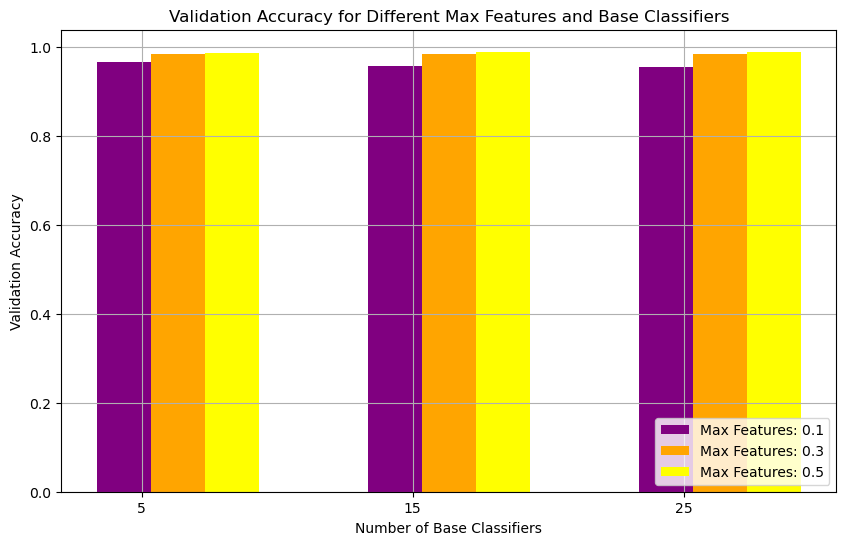

In [263]:
# import matplotlib.pyplot as plt
# import numpy as np

"""
This dictionary contains accuracies as values, with keys being tuples of (n_base_classifiers, max_features)
For instance, (5, 0.1) refers to accuracy1 which we calculated in the prevous step
"""

accuracy_data = {
    #we used [1] for accuracy1, accuracy2... because accuracy[training set, validation set, test set]
    #the question asks for the validation set so the we had to use [1] to get the accuracy for just the
    #validation set
    (5, 0.1): accuracy1[1], (5, 0.3): accuracy2[1], (5, 0.5): accuracy3[1],
    (15, 0.1): accuracy4[1], (15, 0.3): accuracy5[1], (15, 0.5): accuracy6[1],
    (25, 0.1): accuracy7[1], (25, 0.3): accuracy8[1], (25, 0.5): accuracy9[1]
}

"""
Organize the data for plotting, we are etracting the unique values for 'max_features' and 'n_base_classifiers' from the accuracy data.
We already calculated the accuracy in a structured order, however we sorted them again to make sure they are correct
for visualization purposes. sorting ensures that the plot is consistent and easy to interpret 
""" 

max_features_set = sorted(set(key[1] for key in accuracy_data))
n_classifiers_set = sorted(set(key[0] for key in accuracy_data))


"""
In this step, we create a list of accuracies for each max_feature across different n_base_classifiers.
if we were to print the following variable we would get something like this: 
{0.1: [0.9665178571428571, 0.9573660714285714, 0.9560267857142857], 0.3: [....]
"""
acc_for_max_features = {max_feature: [accuracy_data.get((n_classifier, max_feature), None) for n_classifier in n_classifiers_set] 
                       for max_feature in max_features_set}

# Plotting..
plt.figure(figsize=(10, 6))
bar_width = 0.2

#here we calculate the positions for the groups of bars on the x-axis
index = np.arange(len(n_classifiers_set))

# Colors for each group of bars representing different 'max_features'.
colors = ['purple', 'orange', 'yellow']


"""
Plotting bars for each 'max_features' value. we loop through each 'max_feature' 
and its corresponding color, then plot a set of bars for that 'max_feature'
"""
for idx, (max_feature, colors) in enumerate(zip(max_features_set, colors)):
    plt.bar(index + idx * bar_width, acc_for_max_features[max_feature], bar_width, label=f'Max Features: {max_feature}', color=colors)

# Labeling the axes and setting the plot title.
plt.xlabel('Number of Base Classifiers')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Max Features and Base Classifiers')

# Setting the position and labels of x-ticks
plt.xticks(index + bar_width / len(max_features_set), n_classifiers_set)

#To understand which colors correspond to which 'max_features'
#plt.legend() 
plt.legend(loc='lower right')

# Adding a grid to the plot for better readability of the accuracies.
plt.grid(True) 

# Displaying the plot.
plt.show() 


# Accuracy, Precision, Recall, F1 
# ensemble_dt model

In [266]:
#Generate predictions for each set
y_pred_train_ensemble = dt_ensemble.predict(X_train)
y_pred_val_ensemble = dt_ensemble.predict(X_val)
y_pred_test_ensemble = dt_ensemble.predict(X_test)

In [267]:
#TRAINING SET
# Calculate Accuracy, Precision, Recall, and F1 Score for the Training Set
accuracy_train_ensemble = accuracy_score(y_train, y_pred_train_ensemble)
precision_train_ensemble = precision_score(y_train, y_pred_train_ensemble, average='weighted', zero_division=1)
recall_train_ensemble = recall_score(y_train, y_pred_train_ensemble, average='weighted', zero_division=1)
f1_train_ensemble = f1_score(y_train, y_pred_train_ensemble, average='weighted', zero_division=1)

print(f"Training Set Accuracy (DT Ensemble): {accuracy_train_ensemble}")
print(f"Training Set Precision (DT Ensemble): {precision_train_ensemble}")
print(f"Training Set Recall (DT Ensemble): {recall_train_ensemble}")
print(f"Training Set F1-Score (DT Ensemble): {f1_train_ensemble}")


Training Set Accuracy (DT Ensemble): 0.9998883928571428
Training Set Precision (DT Ensemble): 0.9998884094197521
Training Set Recall (DT Ensemble): 0.9998883928571428
Training Set F1-Score (DT Ensemble): 0.9998883844410431


In [268]:
# VALIDATION SET
# Calculate Accuracy, Precision, Recall, and F1 Score for the Validation Set
accuracy_val_ensemble = accuracy_score(y_val, y_pred_val_ensemble)
precision_val_ensemble = precision_score(y_val, y_pred_val_ensemble, average='weighted', zero_division=1)
recall_val_ensemble = recall_score(y_val, y_pred_val_ensemble, average='weighted', zero_division=1)
f1_val_ensemble = f1_score(y_val, y_pred_val_ensemble, average='weighted', zero_division=1)

# Print metrics for the Validation Set
print(f"Validation Set Accuracy (DT Ensemble): {accuracy_val_ensemble}")
print(f"Validation Set Precision (DT Ensemble): {precision_val_ensemble}")
print(f"Validation Set Recall (DT Ensemble): {recall_val_ensemble}")
print(f"Validation Set F1-Score (DT Ensemble): {f1_val_ensemble}")

Validation Set Accuracy (DT Ensemble): 0.9895089285714286
Validation Set Precision (DT Ensemble): 0.9896199077703396
Validation Set Recall (DT Ensemble): 0.9895089285714286
Validation Set F1-Score (DT Ensemble): 0.9894431328931577


In [270]:
#TEST SET
# Calculate Accuracy, Precision, Recall, and F1 Score for the Test Set
accuracy_test_ensemble = accuracy_score(y_test, y_pred_test_ensemble)
precision_test_ensemble = precision_score(y_test, y_pred_test_ensemble, average='weighted', zero_division=1)
recall_test_ensemble = recall_score(y_test, y_pred_test_ensemble, average='weighted', zero_division=1)
f1_test_ensemble = f1_score(y_test, y_pred_test_ensemble, average='weighted', zero_division=1)

print(f"Test Set Accuracy (DT Ensemble): {accuracy_test_ensemble}")
print(f"Test Set Precision (DT Ensemble): {precision_test_ensemble}")
print(f"Test Set Recall (DT Ensemble): {recall_test_ensemble}")
print(f"Test Set F1-Score (DT Ensemble): {f1_test_ensemble}")


Test Set Accuracy (DT Ensemble): 0.9873214285714286
Test Set Precision (DT Ensemble): 0.9874804062331229
Test Set Recall (DT Ensemble): 0.9873214285714286
Test Set F1-Score (DT Ensemble): 0.987219446457129


In [271]:
# Creating a DataFrame from the dictionary
accuracy_df = pd.DataFrame.from_dict(accuracy_results, orient='index', columns=['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'])

# Resetting the index to include the configuration in the DataFrame
accuracy_df.reset_index(inplace=True)
accuracy_df.rename(columns={'index': 'Configuration'}, inplace=True)

# Printing the DataFrame
print(accuracy_df)

  Configuration  Training Accuracy  Validation Accuracy  Test Accuracy
0      (5, 0.1)           0.977344             0.966518       0.961607
1      (5, 0.3)           0.996987             0.983929       0.980893
2      (5, 0.5)           0.998214             0.987723       0.983750
3     (15, 0.1)           0.969922             0.957366       0.955714
4     (15, 0.3)           0.998996             0.985045       0.983571
5     (15, 0.5)           0.999665             0.988393       0.985536
6     (25, 0.1)           0.968750             0.956027       0.953750
7     (25, 0.3)           0.999554             0.985491       0.983214
8     (25, 0.5)           0.999888             0.989509       0.987321


# PLOT 2 - I THINK THIS IS THE CORRECT ONE

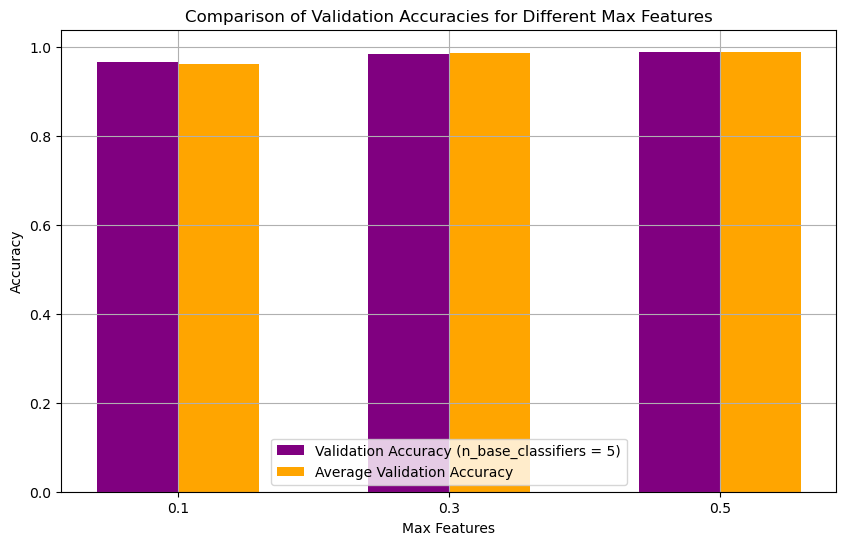

In [294]:
# Replace these with your actual data
val_accuracy_5 = {
    0.1: accuracy1[1],  # 0.966518 Accuracy when max_features = 0.1
    0.3: accuracy2[1],  #0.983929, Accuracy when max_features = 0.3
    0.5: accuracy3[1]  #0.987723, Accuracy when max_features = 0.5
}

# Replace these with the average accuracies for comparison
avg_val_accuracy = {
    
      0.1: (accuracy1[1] + accuracy4[1] + accuracy7[1]) / 3,   #0.1: (0.966518 + 0.957366 + 0.956027) / 3,
      0.3: (accuracy2[1] + accuracy5[1] + accuracy8[1]) / 3,   #0.3: (0.983929 + 0.985045 + 0.985491) / 3,
      0.5: (accuracy3[1] + accuracy6[1] + accuracy9[1]) / 3    #0.5: (0.987723 + 0.988393 + 0.989509) / 3
 

}

# Preparing data for plotting
max_features_set = sorted(val_accuracy_5.keys())
accuracy_val_5 = [val_accuracy_5[mf] for mf in max_features_set]
accuracy_avg_val = [avg_val_accuracy[mf] for mf in max_features_set]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.3
index = np.arange(len(max_features_set))

# Plotting the bars for each max_features setting
plt.bar(index, accuracy_val_5, bar_width, label='Validation Accuracy (n_base_classifiers = 5)', color='purple')
plt.bar(index + bar_width, accuracy_avg_val, bar_width, label='Average Validation Accuracy', color='orange')

plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Comparison of Validation Accuracies for Different Max Features')
plt.xticks(index + bar_width / 2, max_features_set)
plt.legend()
plt.grid(True)
plt.show()


## Plot 3: 
Accuracy for different numbers of base classifiers using a fixed max_features value.

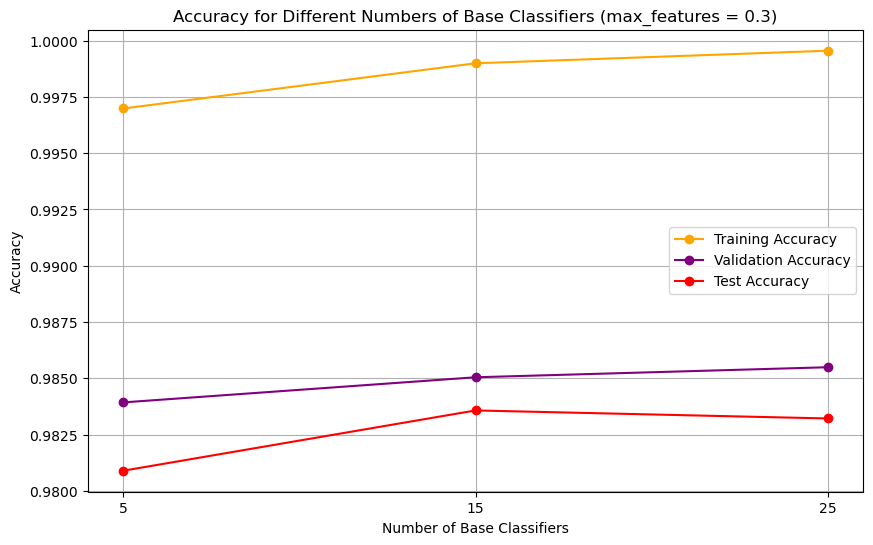

In [301]:
import matplotlib.pyplot as plt

# Your actual data for max_features = 0.3 with different n_base_classifiers
train_accuracies = {
    5:   accuracy2[0],    #0.996987, Training accuracy for n_base_classifiers = 5
    15:  accuracy5[0],    #0.998996, Training accuracy for n_base_classifiers = 15
    25:  accuracy8[0]     #0.999554, Training accuracy for n_base_classifiers = 25
}
val_accuracies = {
    5:  accuracy2[1],   #0.983929, Validation accuracy for n_base_classifiers = 5
    15: accuracy5[1],   #0.985045, Validation accuracy for n_base_classifiers = 15
    25: accuracy8[1]    #0.985491, Validation accuracy for n_base_classifiers = 25
}
test_accuracies = {
    5:  accuracy2[2],       #0.980893, Test accuracy for n_base_classifiers = 5
    15: accuracy5[2],       #0.983571, Test accuracy for n_base_classifiers = 15
    25: accuracy8[2]        #0.983214, Test accuracy for n_base_classifiers = 25
}

n_base_classifiers = [5, 15, 25]  # Different numbers of base classifiers used

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_base_classifiers, [train_accuracies[n] for n in n_base_classifiers], label='Training Accuracy', marker='o', color='orange')
plt.plot(n_base_classifiers, [val_accuracies[n] for n in n_base_classifiers], label='Validation Accuracy', marker='o', color='purple')
plt.plot(n_base_classifiers, [test_accuracies[n] for n in n_base_classifiers], label='Test Accuracy', marker='o', color='red')

plt.xlabel('Number of Base Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Numbers of Base Classifiers (max_features = 0.3)')
plt.xticks(n_base_classifiers)
plt.legend()
plt.grid(True)
plt.show()
